<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Serpientes%20y%20Escaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerias**

In [18]:
import random as rd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

# **Juego de Serpientes y Escaleras**

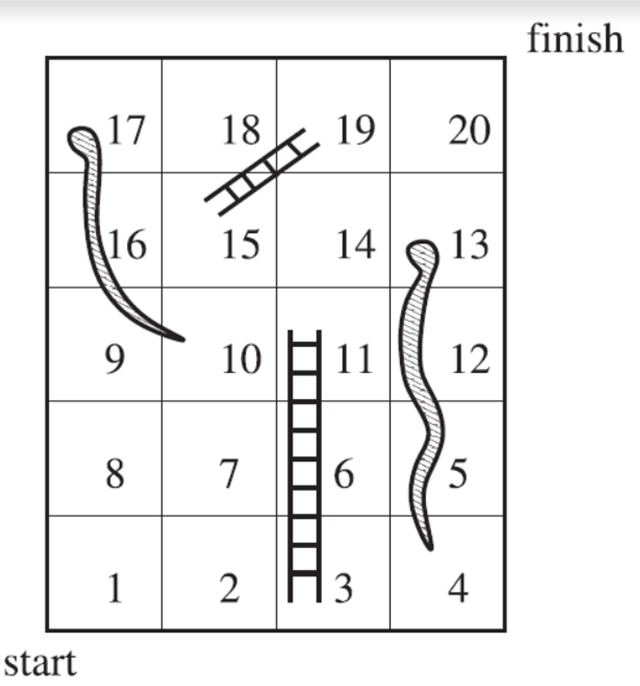

En el juego de **Serpientes y Escaleras** el jugador lanza un dado y se
mueve por el tablero teniendo en cuenta que si cae en una casilla con una escalera sube a la correspondiente posición y si cae en una escalera baja.

El objetivo del juego es llegar a la última casilla. Los jugadores salen desde la casilla número 1 del tablero y para lograr la victoria se tiene que  llegar a la  ́ultima casilla con un número igual o mayor a 20.

# **Analítico**

## **Definimos los estados del juego**

El número de estados corresponde a las casillas del tablero, como el tablero tiene 20 casillas **cada estado es una casilla enumerada del 1 al 20.**

El estado de la victoria (**casilla 20**) es un **estado absorbente**, pues ya que llegas a esa casilla no puedes salir de ella.

## **Construimos la Matriz de Transición $P$**

Cada tiro del dado mueve al jugador entre estados, como el dado tiene 6 caras entonces la matriz de transición $P$ es una matriz de probabilidad $20$X$20$.

Denotaremos con $d$ al resultado obtenido despues de lanzar el dado, asi:


*   Para cada estado $i$, la probabilidad de moverse al estado $i+d$ es $\frac{1}{6}$ siempre que $(i+d)\leq 20$
*   Si $i+d$ lleva a una casilla donde hay una Serpiente o una Escalera, entonces el jugador se movera directamente a la casilla de destino de la Serpiente o Escalera.

 **Escaleras**

 Casilla 3 $→$ Casilla 11

 Casilla 15 $→$ Casilla 19

 **Serpientes**

  Casilla 13 $→$ Casilla 5

  Casilla 17 $→$ Casilla 10

*   Para la casilla 20, la probabilidad de permanecer en 20 es 1 (**estado absorbente**)





$ P = \begin{equation}
\begin{pmatrix}
T & R\\
0 & 1
\end{pmatrix}
\end{equation}$$ =
\begin{equation}
\begin{pmatrix}
0 & \frac{1}{6} &0& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&\frac{1}{6}&0&0&0&0&0&0&0&0&0\\
0 &0&0& \frac{1}{6}& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&\frac{1}{6}&0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0&0&1&0&0&0&0&0&0&0&0&0\\
0&0&0&0&\frac{1}{6}& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&\frac{1}{6}& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&\frac{1}{6}& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&0&0&0&0&0\\
0&0&0&\frac{1}{6}&0&0&0& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&0&0&0&0&0\\
0&0&0&\frac{1}{6}&0&0&0&0& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&\frac{1}{6}&0&0&0&0&0&0\\
0&0&0&\frac{1}{6}&0&0&0&0&0& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&\frac{1}{6}&0&0&0&0& \frac{1}{6}&0\\
0&0&0&\frac{1}{6}&0&0&0&0&0&0&\frac{1}{6}&\frac{1}{6}&0&\frac{1}{6}&0&\frac{1}{6}&0&0& \frac{1}{6}&0\\
0&0&0&\frac{1}{6}&0&0&0&0&0&\frac{1}{6}&0&\frac{1}{6}&0&\frac{1}{6}&0&\frac{1}{6}&0&0& \frac{1}{6}&0\\
0&0&0&\frac{1}{6}&0&0&0&0&0&\frac{1}{6}&0&0&0&\frac{1}{6}&0&\frac{1}{6}&0&\frac{1}{6}& \frac{1}{6}&0\\
0&0&0&1&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0&\frac{1}{6}&0&0&0&0&0&\frac{1}{6}&0&\frac{1}{6}&\frac{1}{3}&\frac{1}{6}\\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&1&0\\
0&0&0&0&0&0&0&0&0&\frac{1}{6}&0&0&0&0&0&0&0&\frac{1}{6}&\frac{1}{6}&\frac{1}{2}\\
0&0&0&0&0&0&0&0&0&1&0&0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{6}&\frac{5}{6}\\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&1\\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&1\\
\end{pmatrix}
\end{equation} $

Donde $T$ es la submatriz que describe las transiciones entre los estados transitorios.

**$T = $ Todas las casillas excepto la final**

$ T = \begin{equation}
\begin{pmatrix}
0 & \frac{1}{6} &0& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&\frac{1}{6}&0&0&0&0&0&0&0&0\\
0 &0&0& \frac{1}{6}& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&\frac{1}{6}&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0&0&1&0&0&0&0&0&0&0&0\\
0&0&0&0&\frac{1}{6}& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&\frac{1}{6}& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&\frac{1}{6}& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&0&0&0&0\\
0&0&0&\frac{1}{6}&0&0&0& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&0&0&0&0&0&0\\
0&0&0&\frac{1}{6}&0&0&0&0& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&\frac{1}{6}&0&0&0&0&0\\
0&0&0&\frac{1}{6}&0&0&0&0&0& \frac{1}{6}&\frac{1}{6}&\frac{1}{6}&0&\frac{1}{6}&0&0&0&0& \frac{1}{6}\\
0&0&0&\frac{1}{6}&0&0&0&0&0&0&\frac{1}{6}&\frac{1}{6}&0&\frac{1}{6}&0&\frac{1}{6}&0&0& \frac{1}{6}\\
0&0&0&\frac{1}{6}&0&0&0&0&0&\frac{1}{6}&0&\frac{1}{6}&0&\frac{1}{6}&0&\frac{1}{6}&0&0& \frac{1}{6}\\
0&0&0&\frac{1}{6}&0&0&0&0&0&\frac{1}{6}&0&0&0&\frac{1}{6}&0&\frac{1}{6}&0&\frac{1}{6}& \frac{1}{6}\\
0&0&0&1&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0&\frac{1}{6}&0&0&0&0&0&\frac{1}{6}&0&\frac{1}{6}&\frac{1}{3}\\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&1\\
0&0&0&0&0&0&0&0&0&\frac{1}{6}&0&0&0&0&0&0&0&\frac{1}{6}&\frac{1}{6}\\
0&0&0&0&0&0&0&0&0&1&0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{6}\\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0\\
\end{pmatrix}
\end{equation} $

Donde $R$ es la submatriz que describe las transiciones desde los estados transitorios hacia el estado absorbente que es la .

$ R =
\begin{equation}
\begin{pmatrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
\frac{1}{6}\\
0\\
\frac{1}{2}\\
0\\
\frac{5}{6}\\
1\\
\end{pmatrix}
\end{equation} $

## **Calcular la matriz fundamental $N$**

La matriz fundamental N describe el **número esperado de veces que el proceso se encuentra en cada estado transitorio antes de ser absorbido.**

Se calcula:

**$N = (I - T)^{-1}$**

Donde:

*   $I$ matriz identidad del tamaño de $T$
*   $(I - T)^{-1}$ matriz inversa de $(I - T)$



In [19]:
# Matriz T -> Submatriz que describe las transiciones entre los estados transitorios
T = np.array([
    [0, 1/6, 0, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 0, 1/6, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 0, 1/6, 0, 0, 0, 0, 1/6],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 1/6, 1/6, 0, 1/6, 0, 1/6, 0, 0, 1/6],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 1/6, 0, 1/6, 0, 1/6, 0, 0, 1/6],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 1/6, 0, 1/6, 0, 1/6, 1/6],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 1/6, 1/3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 1/6, 1/6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])
# I -> Matriz identidad del mismo tamaño que T
I = np.eye(T.shape[0])

# Calcular matriz N
N = np.linalg.inv(I-T)

## **Tiempo de absorción total**

El tiempo total de absorción desde cualquier estado inicial $i$ es la **suma de los tiempos esperados que pasa en todos los estados transitorios.**

Se calcula **sumando las filas de la matriz N.**

In [20]:
#Tiempos -> Lista que guarda los tiempos de absorcion para cada estado transitorio
Tiempos=[]
#Ciclo para calcular el promedio de lanzamientos para cada estado inicial (i)
for i in range(len(N)):
  suma=0
  for j in range(len(N[i])):
    suma+=N[i][j]
  #Se agrega cada valor a la lista Tiempos
  Tiempos.append(suma)

**Tiempo total de absorción para cada estado inicial**

In [21]:
for i in range(len(Tiempos)):
  print("El número promedio de tiradas para terminar el juego comenzando desde la casilla",i+1,"es",Tiempos[i])

El número promedio de tiradas para terminar el juego comenzando desde la casilla 1 es 6.898346651197905
El número promedio de tiradas para terminar el juego comenzando desde la casilla 2 es 6.689589006339384
El número promedio de tiradas para terminar el juego comenzando desde la casilla 3 es 5.4166131857119595
El número promedio de tiradas para terminar el juego comenzando desde la casilla 4 es 6.420101981415994
El número promedio de tiradas para terminar el juego comenzando desde la casilla 5 es 6.133889296315419
El número promedio de tiradas para terminar el juego comenzando desde la casilla 6 es 5.822238698493591
El número promedio de tiradas para terminar el juego comenzando desde la casilla 7 es 5.907647738911078
El número promedio de tiradas para terminar el juego comenzando desde la casilla 8 es 5.437043137188267
El número promedio de tiradas para terminar el juego comenzando desde la casilla 9 es 4.803179831875658
El número promedio de tiradas para terminar el juego comenzando

Como nos interesa saber el número promedio de tiradas necesarias para terminar el juego desde la casilla 1, entonces:

In [22]:
print("El número promedio de tiradas para terminar el juego es de",Tiempos[0])

El número promedio de tiradas para terminar el juego es de 6.898346651197905


# **Simulación**

## **Resultado de tirar un dado**

In [23]:
Dado= rd.randint(1,6)
print("El resultado del dado es",Dado)

El resultado del dado es 1


## **Proceso para determinar el número de tiros necesarios para terminar un juego comenzando desde la casilla 1**

In [24]:
#Comienzo del juego en la casilla 1
casilla=1
#Comienzo del juego con 0 lanzamientos
lanzamientos=0
while casilla<20:
  #Tirar dado
  dado= rd.randint(1,6)
  #Nueva casilla despues del lanzamiento
  casilla+=dado
  #Contador del número de lanzamientos
  lanzamientos+=1
  if casilla==3:
    casilla=11
  elif casilla ==13:
    casilla=4
  elif casilla ==17:
    casilla=10
  elif casilla ==15:
    casilla=19
print("El juego termina con",lanzamientos,"lanzamientos")

El juego termina con 3 lanzamientos


## **Función que calcula el número promedio de lanzamientos para terminar un juego en n repticiones**

In [25]:
def Lanz_promedio(n):
  #Lista que guarda el número de lanzamientos para terminar el juego en cada repeticion
  Lanzamientos=[]
  for i in range(n):
    #Comienzo del juego en la casilla 1
    casilla=1
    #Comienzo del juego con 0 lanzamientos
    lanzamientos=0
    while casilla<20:
      #Tirar dado
      dado= rd.randint(1,6)
      #Nueva casilla despues del lanzamiento
      casilla+=dado
      #Contador del número de lanzamientos
      lanzamientos+=1
      if casilla==3:
        casilla=11
      elif casilla ==13:
        casilla=4
      elif casilla ==17:
        casilla=10
      elif casilla ==15:
        casilla=19
    #Agregar el número de lanzamientos en la repeticion i en la lista
    Lanzamientos.append(lanzamientos)
  promedio=st.mean(Lanzamientos)
  return promedio

## **Número de repeticiones para lograr una mejor aproximación del promedio de lanzamientos para concluir el juego**

Para calcular una mejor aproximación hay que repetir r veces el calculo de la aproximacion y obtener el valor esperado de estas r repeticiones con $r = 1,2,3,...,r$

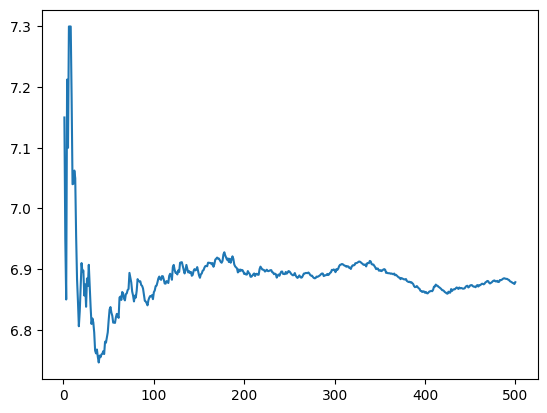

In [26]:
# suma -> Variable que guarda la suma de los valores de la aproximacion en cada repetición
suma=0
# repeticiones -> Lista que guarda el número de repeticiones
repeticiones=[]
# promedios -> Lista que guarda los promedios para cada repetición
promedios=[]
# Ciclo que realiza las r repeticiones
for i in range(500):
  # intentos -> Numero de intentos para calcular cada promedio
  intentos=20
  # Uso de la funcion Promedio de lanzamientos
  Promedio_lanzamientos=Lanz_promedio(intentos)
  # Se suma la nueva aproximacion calculada
  suma+=Promedio_lanzamientos
  # Se calcula el promedio
  promedio=suma/(i+1)
  # Se agrega a la lista de repeticiones la repeticion que se hace al momento
  repeticiones.append(i+1)
  # Se agrega a la lista de promedios el promedio obtenido
  promedios.append(promedio)
# Grafica de los resultados con repeticiones en el eje x y promedios en el eje y
plt.plot(repeticiones,promedios)

# **Comparación del resultado analítico con el de simulación**

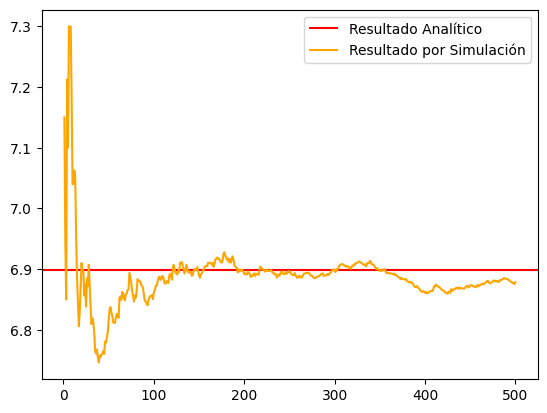

In [30]:
#Resultado Analítico
plt.axhline(Tiempos[0],color="green",label="Resultado Analítico")
# Resultado por simulación
plt.plot(repeticiones,promedios,color="orange",label="Resultado por Simulación")
plt.legend()